In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#crime statistics data
file = "WA Police Force Crime Timeseries.xlsx"
WAstats = pd.read_excel(file,sheet_name = "Data")

#estimated resident population data
erpfile = "ERP.xls"
erp = pd.read_excel(erpfile,sheet_name = "Sheet1", header=2)

#drop nas for blank years
erp.dropna(inplace = True)

#fillna with 0 for 0 crime counts
WAstats.fillna(0, inplace = True)

In [2]:
#change year column to datetime format
erp['Year (ending June 30)'] = pd.to_datetime(erp['Year (ending June 30)'], format='%Y')

In [68]:
#preview crime stats
WAstats.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
0,Armadale District,1.1,Murder,1,Homicide,2007-01-01,2006-07,Armadale DistrictMurderHomicide12007,12007,0.0
1,Armadale District,1.1,Murder,1,Homicide,2007-02-01,2006-07,Armadale DistrictMurderHomicide22007,22007,0.0
2,Armadale District,1.1,Murder,1,Homicide,2007-03-01,2006-07,Armadale DistrictMurderHomicide32007,32007,1.0
3,Armadale District,1.1,Murder,1,Homicide,2007-04-01,2006-07,Armadale DistrictMurderHomicide42007,42007,0.0
4,Armadale District,1.1,Murder,1,Homicide,2007-05-01,2006-07,Armadale DistrictMurderHomicide52007,52007,0.0


In [5]:
#list of regions
regionlist = WAstats['Website Region'].unique()
regionlist

array(['Armadale District', 'Cannington District', 'Fremantle District',
       'Goldfields-Esperance District', 'Great Southern District',
       'Joondalup District', 'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Midland District', 'Mirrabooka District', 'Perth District',
       'Pilbara District', 'Regional WA Region', 'South West District',
       'Western Australia', 'Wheatbelt District'], dtype=object)

In [6]:
#list of crimes Lvl1
crimecatagories = WAstats[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2']].value_counts().reset_index()
crimecatagories.drop(columns=[0], inplace = True)

In [7]:
#list of crimes lvl2
basiccrimedesc = WAstats['WAPOL_Hierarchy_Lvl2'].unique()
basiccrimedesc

array(['Homicide', 'Recent Sexual Offences', 'Historical Sexual Offences',
       'Assault (Family)', 'Assault (Non-Family)',
       'Threatening Behaviour (Family)',
       'Threatening Behaviour (Non-Family)', 'Deprivation of Liberty',
       'Robbery', 'Burglary', 'Stealing of Motor Vehicle', 'Stealing',
       'Property Damage', 'Arson', 'Drug Offences',
       'Receiving and Possession of Stolen Property',
       'Regulated Weapons Offences', 'Graffiti',
       'Fraud & Related Offences', 'Breach of Violence Restraint Order'],
      dtype=object)

In [8]:
#All WA stats from 2019
WAstats2019 = WAstats[WAstats["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
#population df manually created from website query data
population = {'Website Region' : ['Goldfields-Esperance District', 'Great Southern District',
        'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Pilbara District', 'South West District', 'Wheatbelt District'],
    'Population': [54363, 60993,35901, 142960,1900000, 62932,62093, 179791, 73437]}
pop_df = pd.DataFrame(population)

In [76]:
#grouped into region, time period and Lvl 2 crime
Grouped = WAstats2019.groupby(['Website Region','Period','WAPOL_Hierarchy_Lvl2'])['COUNT_of_Offnc_ID'].sum().reset_index()
#merge with population 
GroupedRates = pd.merge(Grouped, pop_df,on='Website Region')
#calculate crime rate
GroupedRates['Rate'] = GroupedRates['COUNT_of_Offnc_ID']/(GroupedRates['Population'])*100000
#preview dataframe
GroupedRates.head()

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Population,Rate
0,Goldfields-Esperance District,2019-02-01,Arson,4.0,54363,7.357946
1,Goldfields-Esperance District,2019-02-01,Assault (Family),69.0,54363,126.924563
2,Goldfields-Esperance District,2019-02-01,Assault (Non-Family),40.0,54363,73.579457
3,Goldfields-Esperance District,2019-02-01,Breach of Violence Restraint Order,29.0,54363,53.345106
4,Goldfields-Esperance District,2019-02-01,Burglary,80.0,54363,147.158913


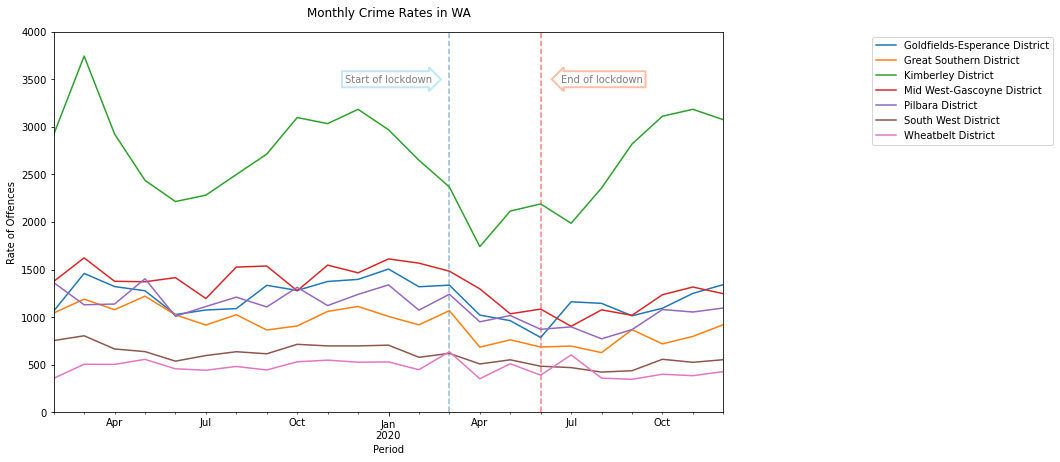

In [77]:
#get total crime rate per region
TotalCrimeRate = GroupedRates.groupby(['Website Region','Period'])['Rate'].sum().reset_index()
TotalCrimeRate = TotalCrimeRate[(TotalCrimeRate['Website Region']!='Metropolitan Region')&(TotalCrimeRate['Website Region']!='Regional WA Region')&(TotalCrimeRate['Website Region']!='Mandurah District')&(TotalCrimeRate['Website Region']!='Western Australia')]
#pivot for graphing
TotalCrimesPivot = TotalCrimeRate.pivot(index='Period', columns='Website Region', values='Rate')
#make chart
TotalCrimesPivot.plot(figsize=(12,7))
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.text(
    "2020-01", 3500, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))
plt.text(
    "2020-08", 3500, "End of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="coral", alpha=0.5, lw=2))
plt.vlines("2020-03",ymin = 0, ymax = 4000,linestyles='dashed', alpha=0.5)
plt.vlines("2020-06",ymin = 0, ymax = 4000, colors ="red",linestyles='dashed', alpha=0.5)
plt.ylim(0,4000)
plt.title("Monthly Crime Rates in WA", pad=15)
plt.ylabel("Rate of Offences")
plt.savefig("crimeratesregions.png",bbox_inches='tight')
plt.show()

In [81]:
#set time frames of pre, into and post lockdown
timeframes = TotalCrimeRate[(TotalCrimeRate['Period']=='2020-02')|(TotalCrimeRate['Period']=='2020-05')|(TotalCrimeRate['Period']=='2020-07')]
timeframes = timeframes[["Website Region",'Period','Rate']]
timeframes


,Website Region,Period,Rate
12,Goldfields-Esperance District,2020-02-01,1318.911760
15,Goldfields-Esperance District,2020-05-01,962.051395
17,Goldfields-Esperance District,2020-07-01,1160.715928
35,Great Southern District,2020-02-01,918.138147
38,Great Southern District,2020-05-01,760.743036
40,Great Southern District,2020-07-01,695.161740
58,Kimberley District,2020-02-01,2648.951283
61,Kimberley District,2020-05-01,2114.147238
63,Kimberley District,2020-07-01,1986.017103
127,Mid West-Gascoyne District,2020-02-01,1566.770482


In [82]:
#get percentage change
overallchange = timeframes.set_index(["Website Region",'Period']).pct_change().multiply(100).round(2)


In [83]:
#get data into separate tables for map plotting
overallchange.reset_index(inplace=True)
Regionsinto = overallchange[overallchange['Period']=='2020-05-01']
Regionsout = overallchange[overallchange['Period']=='2020-07-01']
Regionsinto.to_csv("Regionsinto.csv", encoding = "utf-8", index=False)
Regionsout.to_csv("Regionsout.csv", encoding = "utf-8", index=False)

In [84]:
#get domestic violence data per region
Domesticviolence = GroupedRates[((GroupedRates["WAPOL_Hierarchy_Lvl2"]=="Assault (Family)")|(GroupedRates["WAPOL_Hierarchy_Lvl2"]=="Threatening Behaviour (Family)"))] 
Domesticviolence = Domesticviolence.replace({'Assault (Family)':'Domestic Violence','Threatening Behaviour (Family)':'Domestic Violence'})
Domesticviolence = Domesticviolence.groupby(["Website Region",'Period','WAPOL_Hierarchy_Lvl2'])['Rate'].sum().reset_index()
Domesticviolencecovid = Domesticviolence[((Domesticviolence["Period"]=="2020-02")|(Domesticviolence["Period"]=="2020-05")|(Domesticviolence["Period"]=="2020-07"))]


In [85]:
Domesticviolencecovid

,Website Region,Period,WAPOL_Hierarchy_Lvl2,Rate
12,Goldfields-Esperance District,2020-02-01,Domestic Violence,172.911723
15,Goldfields-Esperance District,2020-05-01,Domestic Violence,185.788128
17,Goldfields-Esperance District,2020-07-01,Domestic Violence,204.182992
35,Great Southern District,2020-02-01,Domestic Violence,113.127736
38,Great Southern District,2020-05-01,Domestic Violence,108.209139
40,Great Southern District,2020-07-01,Domestic Violence,93.453347
58,Kimberley District,2020-02-01,Domestic Violence,693.573995
61,Kimberley District,2020-05-01,Domestic Violence,779.922565
63,Kimberley District,2020-07-01,Domestic Violence,729.784686
81,Mandurah District,2020-02-01,Domestic Violence,146.894236


In [61]:
#get % change in dv between time periods
Domesticviolencechange = Domesticviolencecovid.drop(columns="WAPOL_Hierarchy_Lvl2").set_index(["Website Region",'Period']).pct_change().multiply(100).round(2)

In [62]:
Domesticviolencechange.reset_index(inplace=True)

In [63]:
Regionsdvin = Domesticviolencechange[Domesticviolencechange['Period']=='2020-05']
Regionsdvout = Domesticviolencechange[Domesticviolencechange['Period']=='2020-07']

In [64]:
#save to csv for map plot
Regionsdvin.to_csv("Regionsdvinto.csv", encoding = "utf-8", index=False)
Regionsdvout.to_csv("Regionsdvout.csv", encoding = "utf-8", index=False)

In [65]:

DVpivot = Domesticviolence.drop(columns=["WAPOL_Hierarchy_Lvl2"]).pivot(index='Period', columns='Website Region', values='Rate')

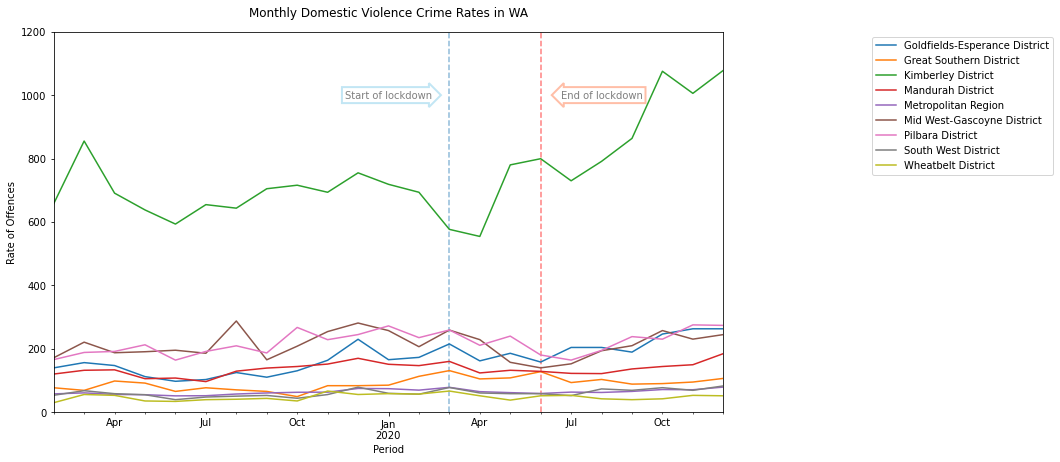

In [67]:
DVpivot.plot(figsize=(12,7))
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.text(
    "2020-01", 1000, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))
plt.text(
    "2020-08", 1000, "End of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="coral", alpha=0.5, lw=2))
plt.vlines("2020-03",ymin = 0, ymax = 1200,linestyles='dashed', alpha=0.5)
plt.vlines("2020-06",ymin = 0, ymax = 1200, colors ="red",linestyles='dashed', alpha=0.5)
plt.ylim(0,1200)
plt.title("Monthly Domestic Violence Crime Rates in WA", pad=15)
plt.ylabel("Rate of Offences")
plt.savefig("dvratesregions.png",bbox_inches='tight')
plt.show()

In [22]:
sasfile = "sasexport.xlsx"
dvhomeless = pd.read_excel(sasfile,sheet_name = "Sheet1",header=3)

In [23]:
dvhomeless.fillna(method='ffill', inplace=True)

In [24]:
WAhomeless = dvhomeless[dvhomeless['State or territory of agency']=='WA']

In [25]:
WAhomeless = WAhomeless.drop(columns=['State or territory of agency'])

In [26]:
WAhomelesstotal = WAhomeless.groupby('Financial year')['Client count'].sum()

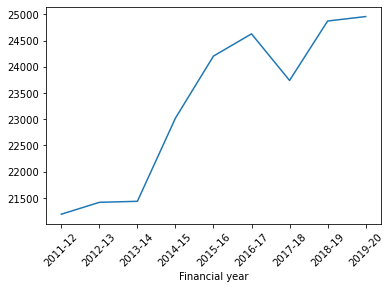

In [27]:
WAhomelesstotal.plot()
plt.xticks(rotation=45)
plt.show()

In [28]:
googlefile = "domestic violence google trend.csv"
dvgoogle = pd.read_csv(googlefile, header = 2)

In [29]:
dvgoogle

,Week,domestic violence: (Western Australia)
0,1/05/2016,100
1,8/05/2016,56
2,15/05/2016,54
3,22/05/2016,46
4,29/05/2016,9
...,...,...
255,21/03/2021,34
256,28/03/2021,17
257,4/04/2021,8
258,11/04/2021,24


In [30]:
dvgoogle['Month/Year'] = pd.to_datetime(dvgoogle['Week'], dayfirst=True).dt.to_period('M')
dvgoogle2019 = dvgoogle[dvgoogle['Month/Year']>='2019-01']
dvgoogle2019

,Week,domestic violence: (Western Australia),Month/Year
140,6/01/2019,18,2019-01
141,13/01/2019,52,2019-01
142,20/01/2019,26,2019-01
143,27/01/2019,26,2019-01
144,3/02/2019,17,2019-02
...,...,...,...
255,21/03/2021,34,2021-03
256,28/03/2021,17,2021-03
257,4/04/2021,8,2021-04
258,11/04/2021,24,2021-04


In [31]:
dvgooglemonthly2019 = dvgoogle2019.groupby('Month/Year')['domestic violence: (Western Australia)'].sum()

<AxesSubplot:xlabel='Month/Year'>

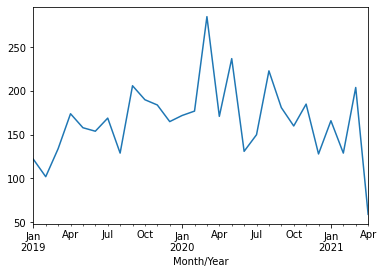

In [32]:
dvgooglemonthly2019.plot()

In [33]:
dvgooglemonthly = dvgoogle.groupby('Month/Year')['domestic violence: (Western Australia)'].sum().reset_index()

In [34]:
dvgooglemonthly.head()

,Month/Year,domestic violence: (Western Australia)
0,2016-05,265
1,2016-06,111
2,2016-07,179
3,2016-08,217
4,2016-09,136


In [35]:
DVcount = WAstats[WAstats["Period"]>dt.datetime(year=2016, month = 1, day = 1)]
DVcount = DVcount[(DVcount['Website Region'] == 'Western Australia')&((DVcount["WAPOL_Hierarchy_Lvl2"]=="Assault (Family)")|(DVcount["WAPOL_Hierarchy_Lvl2"]=="Threatening Behaviour (Family)"))]
DVcount = DVcount.replace({'Assault (Family)':'Domestic Violence','Threatening Behaviour (Family)':'Domestic Violence'})
DVcount = DVcount.groupby(['Period','WAPOL_Hierarchy_Lvl2'])['COUNT_of_Offnc_ID'].sum().reset_index()

In [36]:

DVcount['Month/Year'] = pd.to_datetime(DVcount['Period'], dayfirst=True).dt.to_period('M')
DVrate = pd.merge(DVcount, erp, how='left', left_on = DVcount['Period'].dt.to_period('Y'),right_on = erp['Year (ending June 30)'].dt.to_period('Y'))

In [37]:
DVrate['Rate'] = DVrate['COUNT_of_Offnc_ID']/DVrate['Number'] * 100000

In [38]:
DVrate

,key_0,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Month/Year,Year (ending June 30),Number,Change in number,Change in percent,WA change in percent,Rate
0,2016,2016-02-01,Domestic Violence,2090.0,2016-02,2016-01-01,2555978.0,11711.0,0.4603,0.4603,81.769092
1,2016,2016-03-01,Domestic Violence,2198.0,2016-03,2016-01-01,2555978.0,11711.0,0.4603,0.4603,85.994480
2,2016,2016-04-01,Domestic Violence,1903.0,2016-04,2016-01-01,2555978.0,11711.0,0.4603,0.4603,74.452910
3,2016,2016-05-01,Domestic Violence,1937.0,2016-05,2016-01-01,2555978.0,11711.0,0.4603,0.4603,75.783125
4,2016,2016-06-01,Domestic Violence,1747.0,2016-06,2016-01-01,2555978.0,11711.0,0.4603,0.4603,68.349571
5,2016,2016-07-01,Domestic Violence,1827.0,2016-07,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.479488
6,2016,2016-08-01,Domestic Violence,1818.0,2016-08,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.127373
7,2016,2016-09-01,Domestic Violence,1831.0,2016-09,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.635984
8,2016,2016-10-01,Domestic Violence,1982.0,2016-10,2016-01-01,2555978.0,11711.0,0.4603,0.4603,77.543703
9,2016,2016-11-01,Domestic Violence,2237.0,2016-11,2016-01-01,2555978.0,11711.0,0.4603,0.4603,87.520315


In [39]:
dvmerge = pd.merge(DVrate,dvgooglemonthly, on= 'Month/Year')
dvmerge.head()

,key_0,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Month/Year,Year (ending June 30),Number,Change in number,Change in percent,WA change in percent,Rate,domestic violence: (Western Australia)
0,2016,2016-05-01,Domestic Violence,1937.0,2016-05,2016-01-01,2555978.0,11711.0,0.4603,0.4603,75.783125,265
1,2016,2016-06-01,Domestic Violence,1747.0,2016-06,2016-01-01,2555978.0,11711.0,0.4603,0.4603,68.349571,111
2,2016,2016-07-01,Domestic Violence,1827.0,2016-07,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.479488,179
3,2016,2016-08-01,Domestic Violence,1818.0,2016-08,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.127373,217
4,2016,2016-09-01,Domestic Violence,1831.0,2016-09,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.635984,136


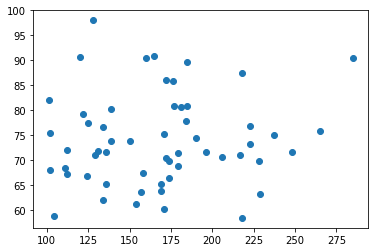

In [40]:
plt.scatter(x=dvmerge['domestic violence: (Western Australia)'], y=dvmerge['Rate'])

In [41]:
googlerespectfile = "1800respect.csv"
respectsearch = pd.read_csv(googlerespectfile, header = 2)
respectsearch.head()

,Week,1800 respect: (Australia)
0,1/05/2016,0
1,8/05/2016,0
2,15/05/2016,0
3,22/05/2016,0
4,29/05/2016,41


In [42]:
respectsearch['Month/Year'] = pd.to_datetime(respectsearch['Week'], dayfirst=True).dt.to_period('M')
respectsearch2019 = respectsearch[dvgoogle['Month/Year']>='2019-01']
respectmonthly2019 = respectsearch2019.groupby('Month/Year')['1800 respect: (Australia)'].sum()

<AxesSubplot:xlabel='Month/Year'>

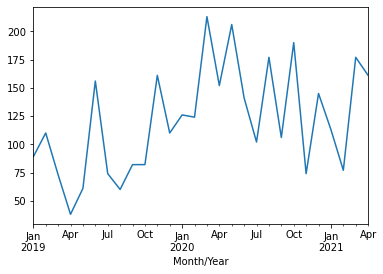

In [43]:
respectmonthly2019.plot()

In [44]:
respectmonthly = respectsearch.groupby('Month/Year')['1800 respect: (Australia)'].sum().reset_index()

In [45]:
resmerge = pd.merge(DVrate,respectmonthly, on= 'Month/Year')
resmerge.head()

,key_0,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Month/Year,Year (ending June 30),Number,Change in number,Change in percent,WA change in percent,Rate,1800 respect: (Australia)
0,2016,2016-05-01,Domestic Violence,1937.0,2016-05,2016-01-01,2555978.0,11711.0,0.4603,0.4603,75.783125,41
1,2016,2016-06-01,Domestic Violence,1747.0,2016-06,2016-01-01,2555978.0,11711.0,0.4603,0.4603,68.349571,98
2,2016,2016-07-01,Domestic Violence,1827.0,2016-07,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.479488,73
3,2016,2016-08-01,Domestic Violence,1818.0,2016-08,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.127373,15
4,2016,2016-09-01,Domestic Violence,1831.0,2016-09,2016-01-01,2555978.0,11711.0,0.4603,0.4603,71.635984,74


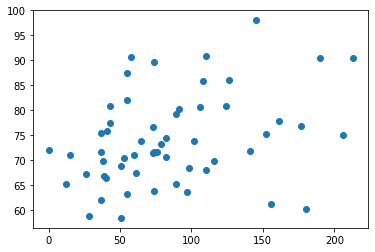

In [46]:
plt.scatter(x=resmerge['1800 respect: (Australia)'], y=resmerge['Rate'])

In [47]:

#erp['Year (ending June 30)']

In [48]:
totalplot = pd.merge(dvmerge,respectmonthly, on= 'Month/Year')
totalplot.rename(columns ={'Rate':'Domestic Violence Offences','domestic violence: (Western Australia)':'Google Searches for domestic violence in Western Australia','1800 respect: (Australia)':'Google Searches for 1800 respect in Australia'}, inplace=True)
#totalplot['Domestic Violence Offences'] = totalplot['Domestic Violence Offences']/10

In [49]:
totalplot = totalplot[['Period','Domestic Violence Offences','Google Searches for domestic violence in Western Australia','Google Searches for 1800 respect in Australia']]

In [50]:
#totalplot = totalplot.drop(columns=['WAPOL_Hierarchy_Lvl2','Month/Year'])


In [51]:
totalplot2019['Period']

NameError: name 'totalplot2019' is not defined

In [54]:
totalplot2019 = totalplot[totalplot['Period']>dt.datetime(year=2019, month = 1,day=1)]

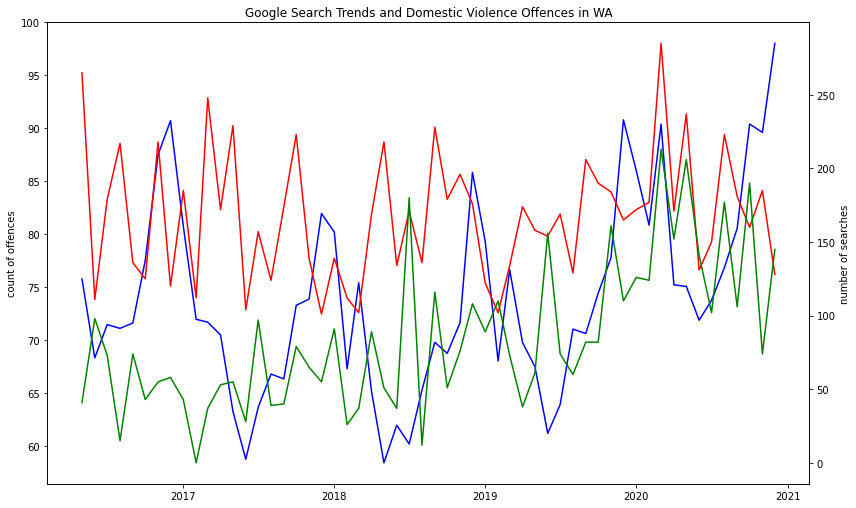

In [55]:
# totalplot.plot(figsize=(12,7))
# plt.legend(bbox_to_anchor = (1.5, 1.0))
# plt.show()


fig, ax1 = plt.subplots(figsize=(12,7))


ax1.set_ylabel('count of offences')
ax1.plot(totalplot['Period'], totalplot['Domestic Violence Offences'],color='b')


ax2 = ax1.twinx() 

ax2.set_ylabel('number of searches')  
ax2.plot(totalplot['Period'], totalplot['Google Searches for domestic violence in Western Australia'],color ='r')
ax2.plot(totalplot['Period'], totalplot['Google Searches for 1800 respect in Australia'],color ='g')



fig.tight_layout() 
plt.title('Google Search Trends and Domestic Violence Offences in WA')
plt.show()




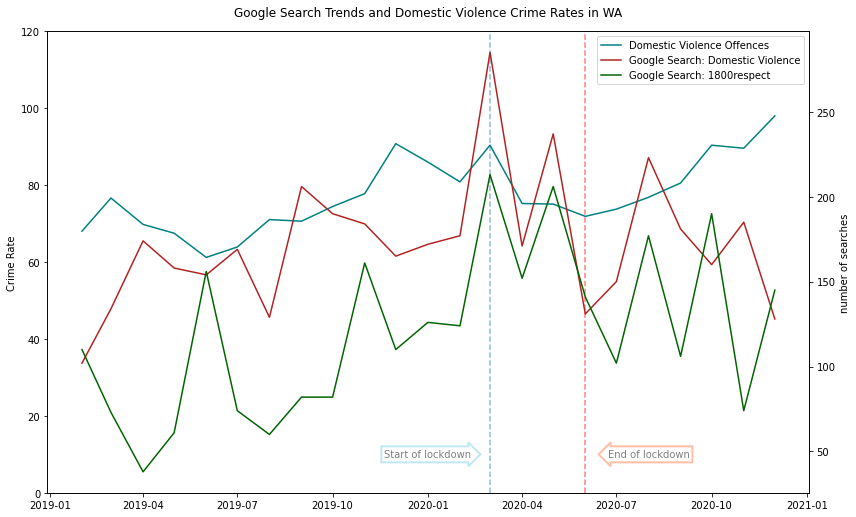

In [56]:
fig, ax1 = plt.subplots(figsize=(12,7))


ax1.set_ylabel('Crime Rate')
ax1.plot(totalplot2019['Period'], totalplot2019['Domestic Violence Offences'],label = 'Domestic Violence Offences',color='teal')


ax2 = ax1.twinx() 

ax2.set_ylabel('number of searches')  
ax2.plot(totalplot2019['Period'], totalplot2019['Google Searches for domestic violence in Western Australia'],label = 'Google Search: Domestic Violence',color ='firebrick')
ax2.plot(totalplot2019['Period'], totalplot2019['Google Searches for 1800 respect in Australia'],label = 'Google Search: 1800respect',color ='darkgreen')

ax1.text(
    dt.datetime(year=2020, month = 1,day=1), 10, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))
ax1.text(
    dt.datetime(year=2020, month = 8,day=1), 10, "End of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="coral", alpha=0.5, lw=2))
ax1.vlines(dt.datetime(year=2020, month = 3,day=1),ymin = 0, ymax = 150,linestyles='dashed', alpha=0.5)
ax1.vlines(dt.datetime(year=2020, month = 6,day=1),ymin = 0, ymax = 150, colors ="red",linestyles='dashed', alpha=0.5)
ax1.set_ylim(0,120)
fig.tight_layout() 
plt.title('Google Search Trends and Domestic Violence Crime Rates in WA', pad=15)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)
plt.savefig("googlesearchtrends.png",bbox_inches='tight')
plt.show()
